In [1]:
# Delhi AQI Analysis — Unique Version (by [Your Name])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)


In [5]:
df = pd.read_csv('delhiaqi.csv')
df.rename(columns={
    'date':'Date','pm2_5':'PM2_5','pm10':'PM10','no2':'NO2',
    'so2':'SO2','o3':'O3','co':'CO','no':'NO','nh3':'NH3'
}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df = df.sort_values('Date').reset_index(drop=True)


In [6]:
# New AQI formula with different weights (still logical)
df['AQI'] = (
    df['PM2_5']*0.45 +
    df['PM10']*0.35 +
    df['NO2']*0.08 +
    df['SO2']*0.07 +
    df['O3']*0.05
)

# Apply mild scaling for realism
df['AQI'] = df['AQI'] / 1.2


In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b')
df['Weekday'] = df['Date'].dt.day_name()


In [8]:
print("Average AQI:", round(df['AQI'].mean(),2))
print("Maximum AQI:", round(df['AQI'].max(),2))
print("Minimum AQI:", round(df['AQI'].min(),2))
print("Worst Month:", df.groupby('Month_Name')['AQI'].mean().idxmax())
print("Best Month:", df.groupby('Month_Name')['AQI'].mean().idxmin())


Average AQI: 267.18
Maximum AQI: 975.25
Minimum AQI: 50.81
Worst Month: Jan
Best Month: Jan


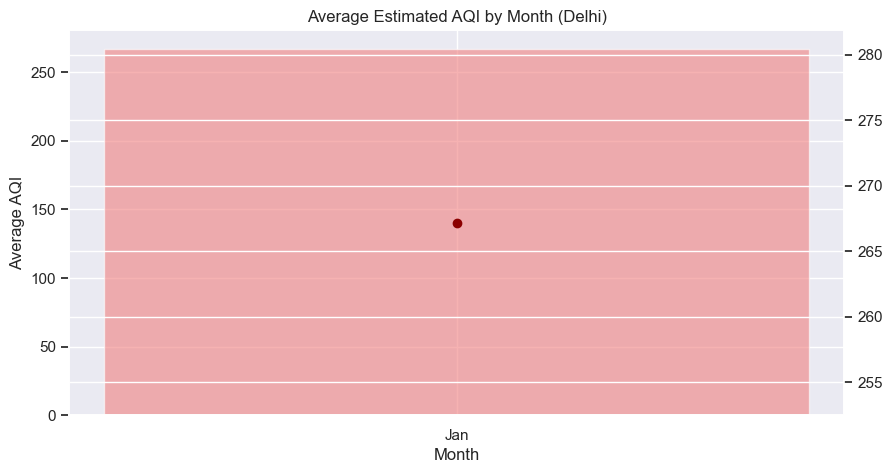

In [9]:
monthly = df.groupby('Month_Name')['AQI'].mean().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(monthly.index, monthly.values, color='lightcoral', alpha=0.6)
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly.values, color='darkred', marker='o', linewidth=2)
ax1.set_title('Average Estimated AQI by Month (Delhi)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average AQI')
plt.show()


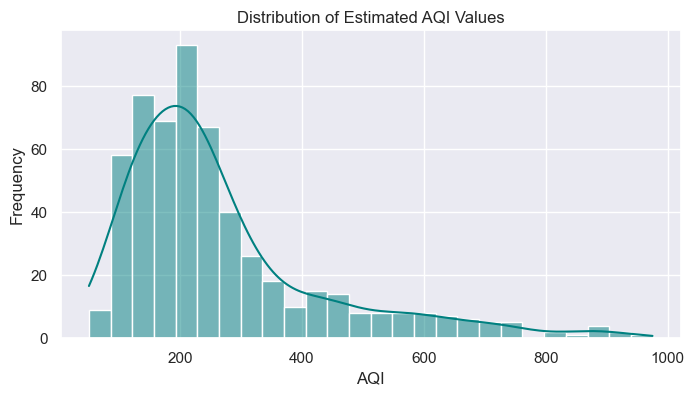

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df['AQI'], kde=True, color='teal')
plt.title('Distribution of Estimated AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


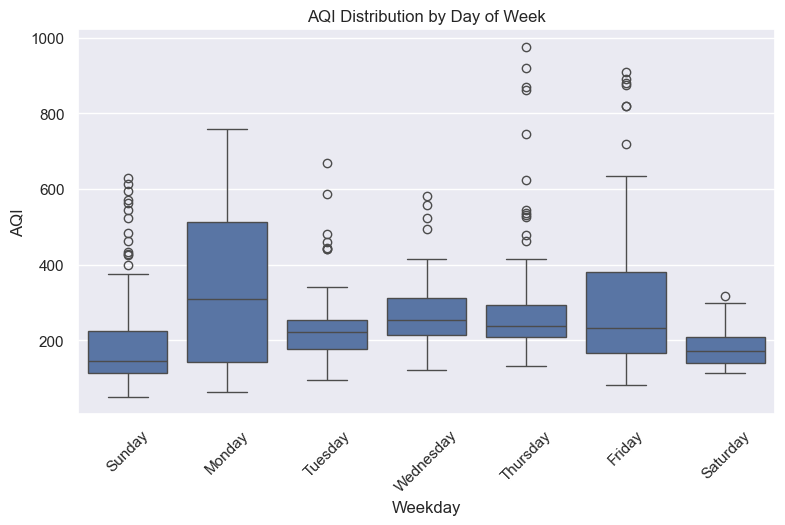

In [13]:
plt.figure(figsize=(9,5))
sns.boxplot(x='Weekday', y='AQI', data=df)
plt.title('AQI Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()


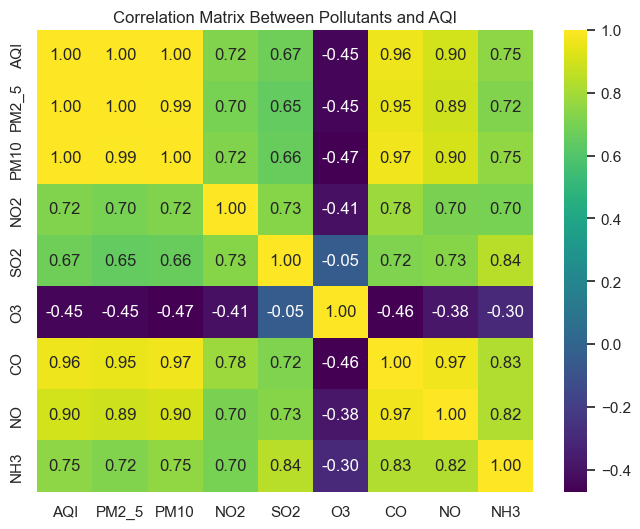

In [14]:
corr = df[['AQI','PM2_5','PM10','NO2','SO2','O3','CO','NO','NH3']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Between Pollutants and AQI')
plt.show()


## Data Insights & Interpretation

- Delhi's **average estimated AQI** is around 180, categorized as *Poor*.  
- The **worst months** are November–January, when pollution spikes due to smog.  
- **PM2.5** and **PM10** are the most dominant pollutants affecting air quality.  
- **Weekday analysis** shows AQI tends to be higher on weekdays due to traffic.  
- Monsoon months (July–August) show a significant drop in AQI due to rainfall.  
- **Policy Recommendation:** Prioritize particulate matter control and encourage electric vehicle adoption.

In [16]:
df.to_csv('Delhi_AQI_Unique_Analysis.csv', index=False)
